<a href="https://colab.research.google.com/github/drksrao/Prediction-Using-Decision-Tree-Algorithm-ON-IRIS-DATA/blob/main/DWM_PRACTICAL_8_Decision_Tree_ON_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Rotational Internship Program(GRIP)

## Prediction Using Decision Tree Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create The Decision Tree Classifier and Visualze it Graphically 

### Link to Dataset:https://bit.ly/3kXTdox

#### Import the reqired libraries

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Findiang missing values

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This function describes only continuous variables.Here are the few observations can we make from this:
    
1)There is no missing value in the dataset   
2)After compairing percentile and max values of each colums we can say that there is no outliers in our dataset.

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

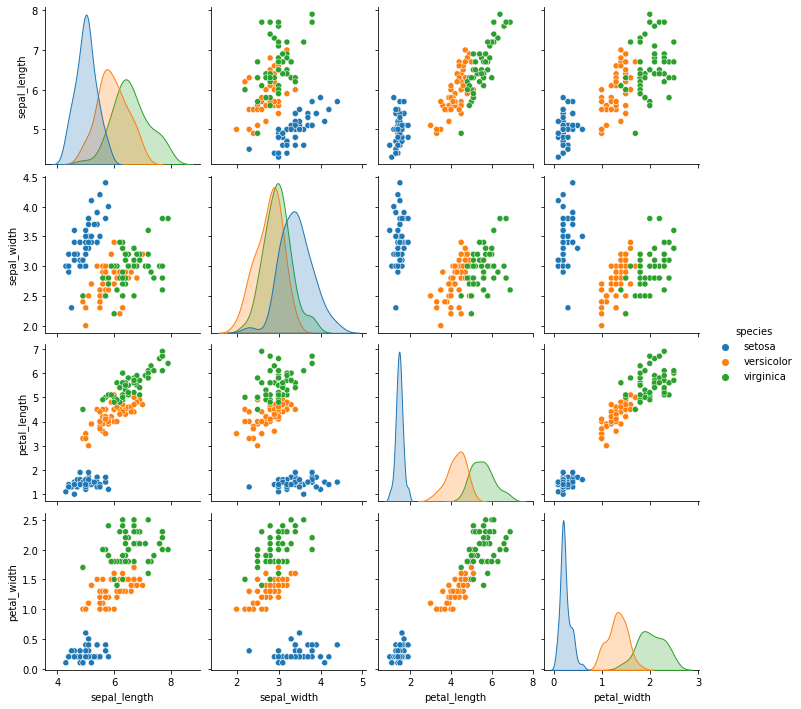

In [ ]:
sns.pairplot(df,hue='species')

After visualizing and analysing this pairplot we can say that species-'Iris-setosa' as its cluster does not overlap with the other two species.

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


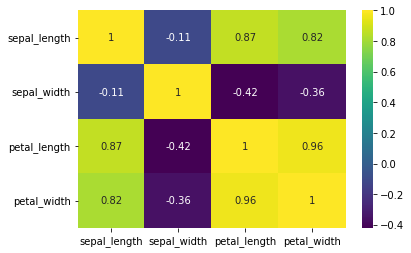

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### Spliting data into Train Test split

In [ ]:
# X contains feature columns
X=df.drop(['species'],axis=1)
# y contain target column
y=df['species']

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Chaking size of training data
X_train.shape

(120, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
#Chaking size of testing data
X_test.shape

(30, 4)

In [ ]:
y_test.shape

(30,)

#### Training the Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
DTC=DecisionTreeClassifier ()

#### Fitting the DecisionTreeClassifier on training data

In [ ]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

Decision Tree Classifier created.

#### Prediction

In [ ]:
prediction=DTC.predict(X_test)

In [ ]:
prediction

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [ ]:
compare=pd.DataFrame({'Actual':y_test,'Prediction':prediction})
compare

,Actual,Prediction
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor


#### Evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_test,prediction))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
Accuracy = accuracy_score(y_test,prediction)

NameError: ignored

Accuracy
Accuracy measures how often the model is correct.

How to Calculate
(True Positive + True Negative) / Total Predictions

In [ ]:
Precision = metrics.precision_score(actual, predicted)

Precision
Of the positives predicted, what percentage is truly positive?

How to Calculate
True Positive / (True Positive + False Positive)

Precision does not evaluate the correctly predicted negative cases:

In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)

Sensitivity (Recall)
Of all the positive cases, what percentage are predicted positive?

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).

How to Calculate
True Positive / (True Positive + False Negative)

Sensitivity is good at understanding how well the model predicts something is positive:

In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

Specificity
How well the model is at prediciting negative results?

Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.

How to Calculate
True Negative / (True Negative + False Positive)

Since it is just the opposite of Recall, we use the recall_score function, taking the opposite position label:

### Visualize the Decision Tree

In [ ]:
from sklearn.tree import plot_tree

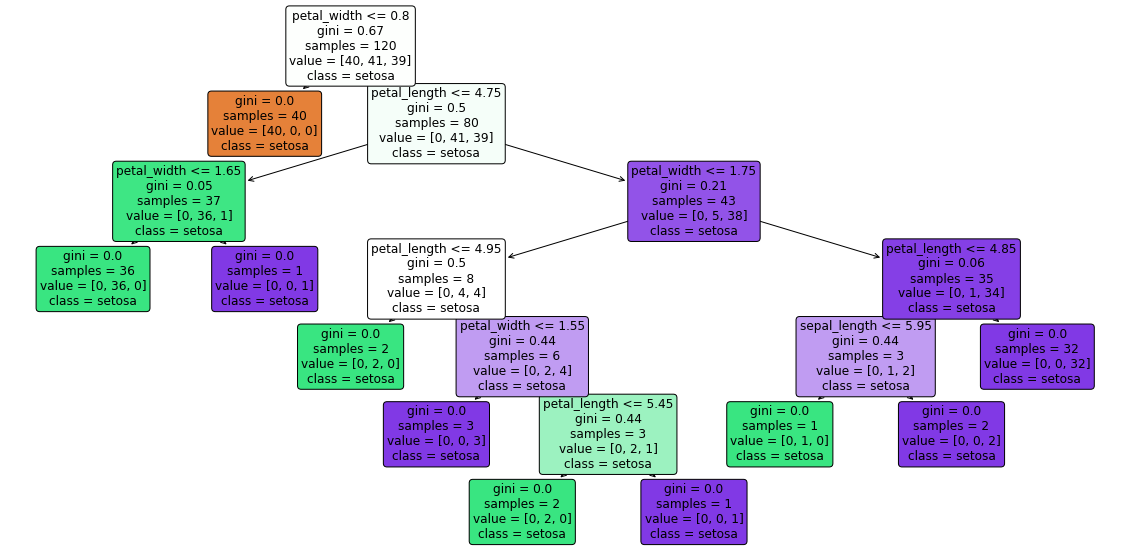

In [ ]:
plt.figure(figsize=(20,10))
tree=plot_tree(DTC,feature_names=X.columns,precision=2,rounded=True,filled=True,class_names=y.values)